# Machine Learning in Python

by [Piotr Migdał](http://p.migdal.pl/)

Inkubator Uniwersytetu Warszawskiego

## 3.  Linear regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

## Bicycles data

This dataset shows number of bikes present at several streets in Warsaw, together with weather data.

source:

- Monika Pawłowska (code: https://github.com/pawlowska/shiny-server)

- original source: http://rowery.um.warszawa.pl/pomiary-ruchu-rowerowego

In [2]:
bicycles_weather_data = pd.read_csv("data/dane_zsumowane_z_pogoda.csv", index_col=0)

In [3]:
bicycles_weather_data.head()

,Data,startTyg,startM,Al. Jerozolimskie - suma,Al. Jerozolimskie płd.,Al. Jerozolimskie płn.,Al. USA - suma,Al. USA płd.,Al. USA płn.,Banacha,...,Wysockiego,Żwirki i Wigury/Trojdena - suma,Żwirki i Wigury/Trojdena wsch.,Żwirki i Wigury/Trojdena zach.,temp_min,temp_avg,temp_max,deszcz,snieg,Jaki_dzien
1,2014-08-01,2014-07-28,2014-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,19.9,21.1,24.3,3.8,0.0,roboczy
2,2014-08-02,2014-07-28,2014-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,19.2,24.8,31.6,0.0,0.0,weekend
3,2014-08-03,2014-07-28,2014-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,18.5,25.4,31.0,0.0,0.0,weekend
4,2014-08-04,2014-08-04,2014-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,19.9,24.3,32.8,10.2,0.0,roboczy
5,2014-08-05,2014-08-04,2014-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,17.4,21.7,25.9,0.0,0.0,roboczy


In [ ]:
bicycles_weather_data.describe()

## Linear regression

Linear regression is modelling linear relationship between dependent variable y and one or more explanatory variables X. The case of one explanatory variable is called **simple linear regression**. For more than one explanatory variable, the process is called **multiple linear regression**.

$$
y = a x + b
$$

!["xkcd"](https://imgs.xkcd.com/comics/linear_regression.png)

Analyticas solutions exist:

- [Ordinary least squares](https://en.wikipedia.org/wiki/Ordinary_least_squares)

- [Ridge regression](https://en.wikipedia.org/wiki/Ridge_regression)

but are not always very efficient!

Correlation:

!["source: wikipedia.org"](https://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg)

Materials:

 - https://en.wikipedia.org/wiki/Linear_regression
 
 - http://setosa.io/ev/ordinary-least-squares-regression
 
 - http://onlinestatbook.com/2/regression/intro.html
 
 - https://www.youtube.com/watch?v=KsVBBJRb9TE
 


(-20, 25)

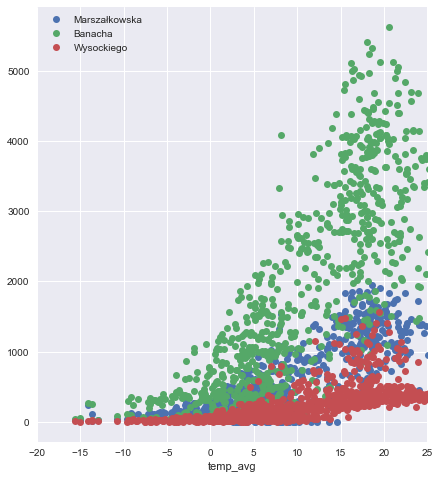

In [4]:
bicycles_weather_data.plot(x='temp_avg', y=['Marszałkowska', 'Banacha', 'Wysockiego'], style='o', figsize=(7,8))
plt.xlim([-20,25])

Scikit learn documentation:

- http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

- http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html

In [5]:
from sklearn.linear_model import LinearRegression

We make a linear regression object.

In [6]:
linreg = LinearRegression()

In [19]:
cols = ['temp_avg', 'temp_min',  'temp_max',  'deszcz', 'snieg']
street = 'Banacha'
bicycles_weather_subset = bicycles_weather_data[cols + [street]]
bicycles_weather_subset = bicycles_weather_subset.dropna()

In [20]:
bicycles_weather_subset.head()

,temp_avg,temp_min,temp_max,deszcz,snieg,Banacha
302,14.2,4.7,20.6,0.0,0.0,3374.0
303,17.2,12.0,23.4,0.3,0.0,2536.0
304,14.9,10.8,19.3,0.0,0.0,3214.0
305,19.3,9.6,26.2,0.0,0.0,4120.0
306,21.7,15.1,28.1,0.0,0.0,4403.0


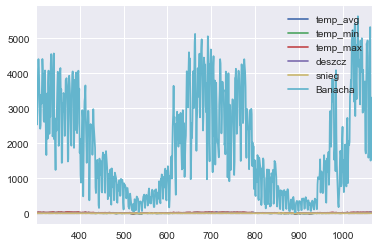

In [21]:
bicycles_weather_subset.plot()

In [47]:
np.log10(1000)

3.0

In [48]:
X = bicycles_weather_subset[cols]  # a DataFrame, not a Series
y = bicycles_weather_subset[street]
y = np.log10(y)
linreg.fit(X, y)

print("Mean squared error: {:.1f}".format(np.sqrt(np.mean((linreg.predict(X) - y) ** 2))))

Mean squared error: 0.3


In [49]:
linreg.score(X, y)

0.68180131720139192

In [50]:
linreg.intercept_

2.5358239983941457

In [51]:
linreg.coef_

array([ 0.01169679, -0.00894234,  0.03495416, -0.01344286, -0.02294869])

See more: [Root-mean-square error (RMSE)](https://en.wikipedia.org/wiki/Root-mean-square_deviation)

We can plot our predicted curve.

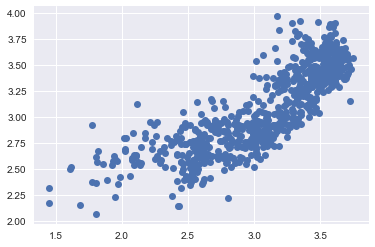

In [52]:
plt.plot(y, linreg.predict(X), 'o')

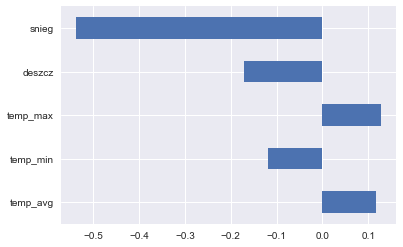

In [43]:
coefficients = pd.Series(linreg.coef_, index=cols)
coefficients = coefficients / X.std()
coefficients.plot(kind='barh')

### Exercises

* Add other paremeters (`deszcz`, `snieg`, etc)
* Find in the dataset a street which closest to yours living / working place and perform linear regression.
* Extra: scale variables by `np.sqrt` or `np.log`